# This notebook is used to explain BTK model in details
Outline:
1. theory
2. Z dependence
3. T dependence

In [210]:
import numpy as np
import matplotlib.pyplot as plt

Define a few parameters

In [213]:
Delta=1 # superconducting gap in meV
Z=0 # dimensionless barrier strength
E=np.arange(-2*Delta, 2*Delta, 0.01) # energy in meV

def u02(E):
    return 0.5 * (1 + ((E**2 - Delta**2) / E**2)**0.5) # u_0^2, electron wavefunciton probability

def v02(E):
    return 1-u02(E) # v_0^2, hole wavefunction probability

def gamma2(E,Z):
    return (u02(E) + Z**2 * (u02(E) - v02(E)))**2 # a factor for simplifying equations

def Ns(E):
    return (u02(E) - v02(E))**(-1) # DOS of superconductor

/Users/Kirais/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


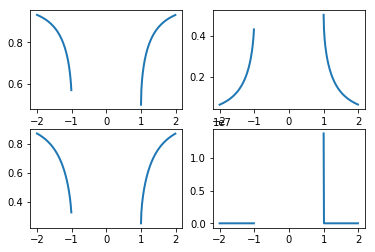

In [214]:
E=np.arange(-2*Delta, 2*Delta, 0.01) # energy in meV

plt.figure(1)

plt.subplot(221)
plt.plot(E, u02(E), lw=2)

plt.subplot(222)
plt.plot(E, v02(E), lw=2)

plt.subplot(223)
plt.plot(E, gamma2(E,Z), lw=2)

plt.subplot(224)
plt.plot(E, Ns(E), lw=2)

#plt.ylim(-2, 2)
plt.show()

0.9999997499999376
2.500000624294785e-07
1000000999999.5002


At E >> Delta, u02 = 1, v02 = 0, gamma2 = 

Define probability functions

In [269]:
def A(E,Delta,Z): # Andreev reflection
    if np.abs(E) < Delta:
        return Delta**2 / (E**2 + (Delta**2 - E**2) * (1 + 2*Z**2)**2) 
    else:
        return u02(E) * v02(E) / gamma2(E,Z)
    
def B(E,Delta,Z): # ordinary electron reflection
    if np.abs(E) < Delta:
        return 1-A(E,Delta,Z) 
    else:
        return (u02(E)-v02(E))**2 * Z**2 * (1+Z**2) / gamma2(E,Z)
    
def C(E,Delta,Z): # transmission without branch crossing
    if np.abs(E) < Delta:
        return 0 
    else:
        return u02(E) * (u02(E)-v02(E))**2 * (1+Z**2) / gamma2(E,Z)

def D(E,Delta,Z): # transmission with branch crossing
    if np.abs(E) < Delta:
        return 0 
    else:
        return v02(E) * (u02(E)-v02(E))**2 * Z**2 / gamma2(E,Z)

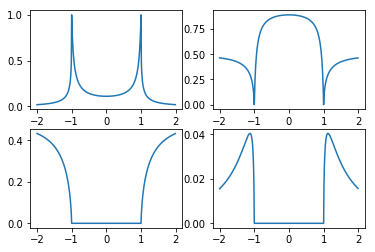

In [270]:
Delta = 1 # superconducting gap in meV
E=np.arange(-2*Delta, 2*Delta, 0.01) # energy in meV
Z=1 # dimensionaless barrier strength

plt.figure(1)

plt.subplot(221)
plt.plot(E, list(map(lambda x: A(x, Delta, Z), E)))

plt.subplot(222)
plt.plot(E, list(map(lambda x: B(x, Delta, Z), E)))

plt.subplot(223)
plt.plot(E, list(map(lambda x: C(x, Delta, Z), E)))

plt.subplot(224)
plt.plot(E, list(map(lambda x: D(x, Delta, Z), E)))

plt.show()

Fermi-Dirac distribution

In [271]:
kb=8.617330350*10**-2 # Boltzman constant in meV/K
mu=1000 # chemical potential in meV
T=300 # temperature in K
def f0(E,T):
    return 1/(np.exp((E-mu)/(kb*T))+1)

/Users/Kirais/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


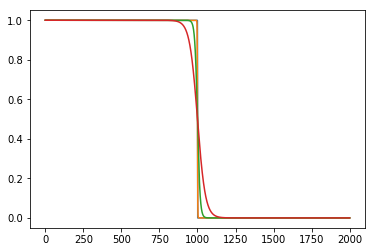

In [272]:
E=np.arange(0,2000,0.01) # energy in meV

plt.figure(1)
plt.subplot(111)
for T in {1,10,100,300}:
    plt.plot(E, f0(E,T))
plt.show()

Tunneling conductance

In [286]:
N0=1
eV=0.1 # in meV
Delta=1
def dGs(E,T,Delta,Z): # differential conducatance
    return N0 * (1+A(E,Delta,Z)-B(E,Delta,Z))
def dGsdGn(E,T,Delta,Z): # Normalised differential conductance by normal state conductacne
    return N0 * (1+A(E,Delta,Z)-B(E,Delta,Z))/(1/(1+Z**2))

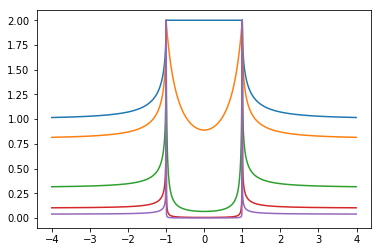

In [287]:
Delta=1
E=np.arange(-4*Delta,4*Delta, 0.01) # energy
Z=1
T=1
plt.figure(1)
plt.subplot(111)
for i in {0,0.5,1.5,3.0,5.0}:
    plt.plot(E, list(map(lambda x: dGs(x, T, Delta, i), E)), label = i)
plt.show()

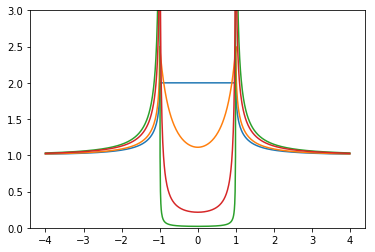

In [291]:
Delta=1
E=np.arange(-4*Delta,4*Delta, 0.01) # energy
Z=1
T=1
plt.figure(1)
plt.subplot(111)
for i in {0,0.5,1.5,5.0}:
    plt.plot(E, list(map(lambda x: dGsdGn(x, T, Delta, i), E)), label = i)
plt.ylim(0,3)
plt.show()